In [1]:
file = open("C:\\Users\\Patrick Doyne\\Downloads\\mason_reviews_v2.txt","r").read()

In [2]:
from textblob import TextBlob

text = file
blob = TextBlob(text)

In [3]:
#Problem 1
len(blob.sentences)

23

In [4]:
#Problem 2
print(blob.noun_phrases)

['george mason', 'inclusive campus', 'great space', 'george mason', 'diverse school', 'overall', 'great teachers', 'scholarship opportunities', 'online school', 'george mason', 'covid', 'internship opportunities', 'new things', 'great atmosphere', 'george mason patriot', 'commuter college', 'traditional college experience', 'decent college', 'online courses', 'online courses', 'good note', 'financial aid', 'rediculous amounts', 'this pandemic', "wo n't", 'paperwork']


In [5]:
#Problem 3

#a.
print(len(blob.words))

#b
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_count = 0
my_stopwords = stopwords.words("english")
for x in blob.words:
    if x in my_stopwords:
        stop_count=stop_count+1
print(stop_count)

#c
print(len(blob.words)-stop_count)

368
167
201


[nltk_data] Downloading package stopwords to C:\Users\Patrick
[nltk_data]     Doyne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Problem 4
print(blob.sentiment)
""" The mason reviews were roughly split bewteen being subjective and objective
with them leaning to be slightly more subjective (opinionated)"""

Sentiment(polarity=0.3152060236511456, subjectivity=0.5244604582409461)


' The mason reviews were roughly split bewteen being subjective and objective\nwith them leaning to be slightly more subjective (opinionated)'

In [7]:
#Problem 5
print(blob.sentiment)
""" The mason reviews were roughly split between having positve and negative
conoatations with them leaning more towards the positve side"""

Sentiment(polarity=0.3152060236511456, subjectivity=0.5244604582409461)


' The mason reviews were roughly split between having positve and negative\nconoatations with them leaning more towards the positve side'

In [8]:
#Problem 6
sentiment_scores= []
for each_sent in blob.sentences:
    sentiment_scores.append(each_sent.sentiment)
print(sentiment_scores[0:5])

[Sentiment(polarity=0.3333333333333333, subjectivity=0.25), Sentiment(polarity=0.35, subjectivity=0.44999999999999996), Sentiment(polarity=0.4, subjectivity=0.375), Sentiment(polarity=0.5, subjectivity=0.5), Sentiment(polarity=0.5, subjectivity=0.5)]


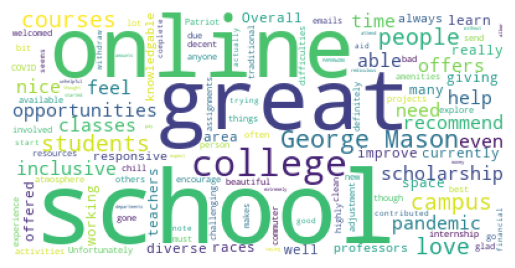

In [9]:
#Problem 7
import matplotlib.pyplot as plt
from wordcloud import WordCloud
my_wordcloud = WordCloud(random_state=433, background_color = "white")
my_wordcloud.generate(file)
plt.axis("off")
plt.imshow(my_wordcloud)

       word  count
12   school      6
2     mason      4
52  college      4
27   online      4
6     great      4


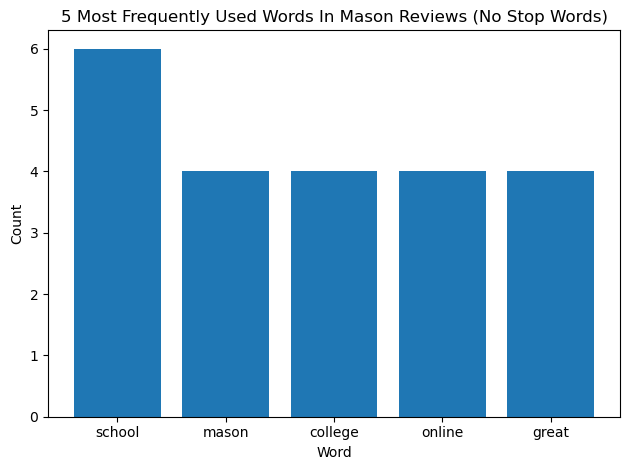

In [10]:
#Problem 8
items= []
my_stopwords = stopwords.words("english")
my_stopwords.append("n't")

for x in blob.words.lower():
    if x not in my_stopwords:
        items.append(x)
cleaned_string = " ".join(items)


from nltk.probability import FreqDist
blob = TextBlob(cleaned_string)
word_freq = FreqDist(blob.words)

import pandas as pd
df = pd.DataFrame(word_freq.items(), columns=["word","count"])
df.sort_values("count", ascending= False, inplace = True)
print(df.head())

plt.bar(df.iloc[0:5]["word"], df.iloc[:5]["count"])
plt.ylabel("Count")
plt.xlabel("Word")
plt.title("5 Most Frequently Used Words In Mason Reviews (No Stop Words)")
plt.tight_layout()
